

<center>
<h1>Lab 5: 3D projective geometry and stereo</h1>
</center>

<center>428/615, Martin Jagersand</center>
<br>
<font color="#FF0000">
Submit code and report electronically through the upload link on the e-Class course webpage.<br>
Marks may be given for any of the questions in the assignment, so
please answer them all <br>(many only require a one sentence answer).<br>
Demo: In your lab session.
<!-- Demo: In your lab session during the week following the due date. -->
</font>
<br>
<br>
<p><b>
<font size="+1">Exercise 1: Homogeneous transforms and projections </font>
</b> <b>(3)</b>

</p><p> References:
<a href="http://ugweb.cs.ualberta.ca/~vis/courses/CompVis/lectures18/lec06GeomIntro.pdf">lec06GeomIntro.pdf</a>
slides 51-58, <a href="https://math.oregonstate.edu/home/programs/undergrad/CalculusQuestStudyGuides/vcalc/lineplane/lineplane.html">Equations
of Lines and Planes </a>, <a href="https://www.mathopenref.com/coordparamcircle.html">Parametric
Equation of a Circle</a>

</p><blockquote>
<p>In Matlab, define 3D geometric point "clouds" defining a line, rectangle,
circle, and the wireframe edges of a box or cube.
</p><p><i>Hint:</i>Use the rand function and transform the resulting uniform
distributions so they extend over a line, square etc...
<br>You can check your results using the 3d plotting: "plot3"
</p><p>Define the transforms below using homogeneous coordinates and project
each shape above and image (using regular 2D "plot(u,v,'.')") the result
under:
<br>&nbsp;
</p><ul>
<li>
Straight orthographic projection</li>

<li>
Perspective projection without rotation (i.e. the image plane is parallel to the largest face of each 3D shape)</li>

<li>
Perspective projection with one or more rotations (i.e. the image plane is not parallel to the largest face of any 3D shape)</li>
</ul>
<i>Note:</i> Place the camera somewhere outside of the scene so all the
points are visible.
<br>
</blockquote><img src="q3.jpeg" width="791" height="222">
<blockquote>
<ul>
<li>
Figure out what each of the projections mean geometrically and draw (by
hand) the corresponding diagrams showing the figure, imaging plane and
principle of projection for each projection type.</li>

<li>
What 2D figure does each one of the 3D structures project to?</li>

<li>
Explain the results.</li>

<li>
How does this exercise relate to camera calibration?</li>

<li>What main property or properties of real-world imaging is not modeled
properly?</li>

</ul>
</blockquote>


<IPython.core.display.Javascript object>


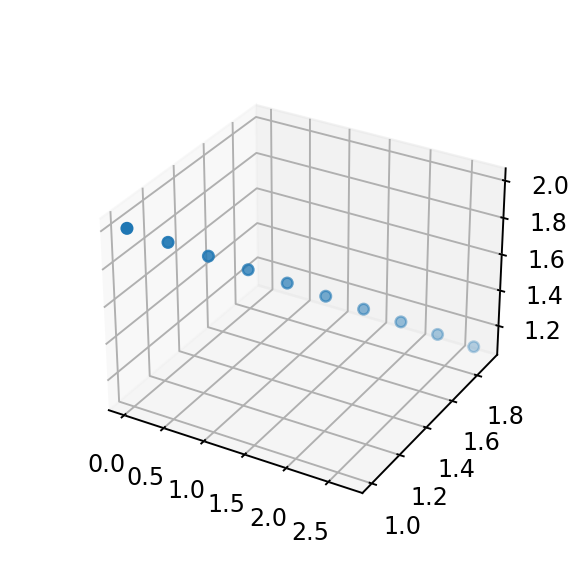

C:\Users\Dariu\anaconda3\envs\tf\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:902: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\Dariu\anaconda3\envs\tf\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


<IPython.core.display.Javascript object>


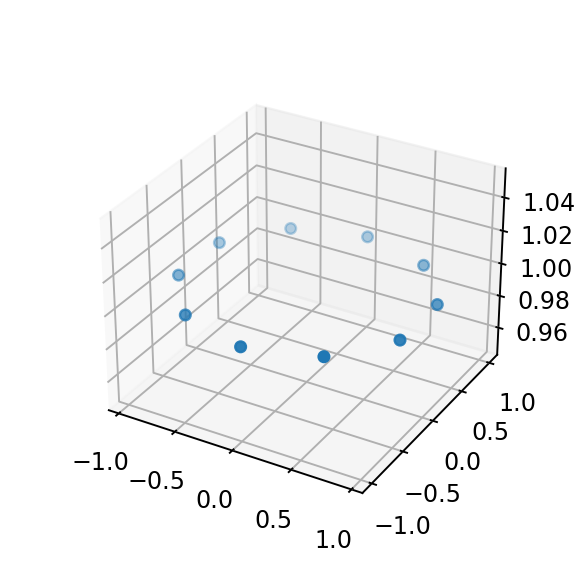

<IPython.core.display.Javascript object>


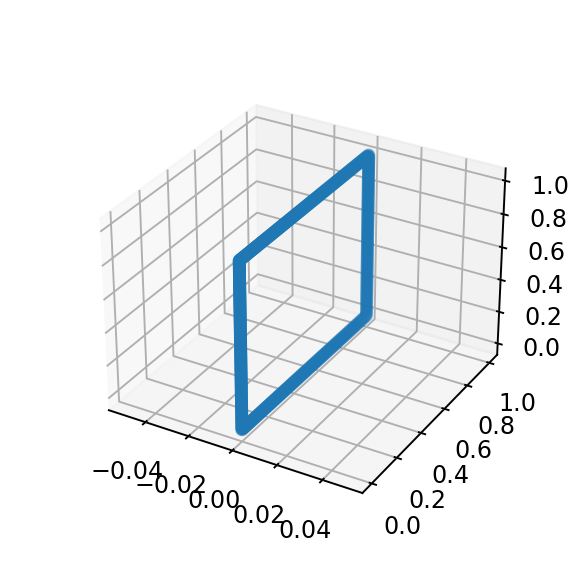

<IPython.core.display.Javascript object>


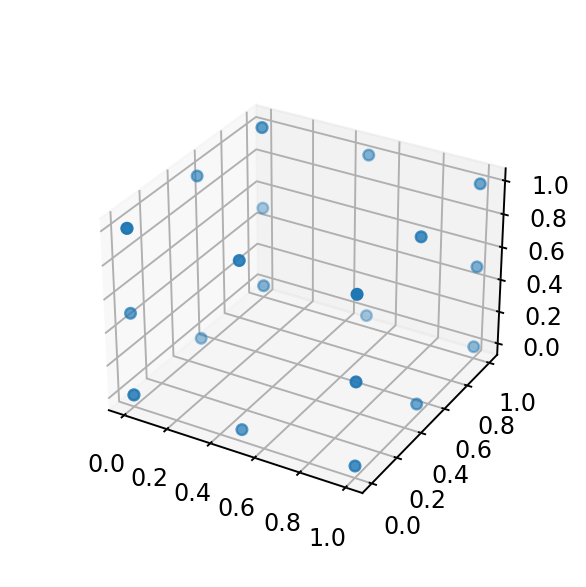

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
# from mpl_toolkits.mplot3d import Axes3D

def createLine (point1, point2, size):
    step = (np.array(point2) - np.array(point1))/size
    if (step[0] == 0 ):
        x = np.ones((size))* point1[0]
    else:
        x = np.arange(point1[0],point2[0], step[0])
    if (step[1] == 0 ):
        y = np.ones((size))* point1[1]
    else:
        y = np.arange(point1[1],point2[1],step[1])
    if (step[2] == 0 ):
        z = np.ones((size))* point1[2]
    else:
        z = np.arange(point1[2],point2[2],step[2])
    c = np.ones((size))
#     print(x, y, z, c)
    return np.array([x, y, z, c])
def createCircle(radius, size):
    step = 2 * np.pi/size
    t = np.arange(0, 2*np.pi, step)
    x = radius * np.sin(t)
    y = radius * np.cos(t)
    z = np.ones((size))
    c = np.ones((size))
    return np.array([x, y, z, c])
def createSquare(point1, point2, point3, point4, size):
    input = [point1, point2, point3, point4]
    Square = []
    for i in range(len(input)):
        temp = createLine(input[i-1], input[i], size)
        if i == 0:
            Square = temp
        else:
            Square = np.concatenate((Square,temp), axis = 1)
    return Square
def createWireframe(p1, p2, p3, p4, p5, p6, p7, p8, size):
    input = [p1, p2, p3, p4, p5, p6, p7, p8]
    square1 = input[:4]
    square2 = input[4:8]
    Frame = createSquare(*square1, size)
    Frame = np.concatenate((Frame, createSquare(*square2, size)), axis = 1)
    for i in range(4):
        Frame = np.concatenate((Frame, createLine(input[i], input[i+4], size)), axis = 1)
    return Frame


res = []
res.append(createLine([0,1,2], [3,2,1], 10))
res.append(createCircle(1, 10))
res.append(createSquare([0,0,0], [0,0,1], [0,1,1], [0,1,0], 100))
res.append(createWireframe([0,0,0], [0,0,1], [0,1,1], [0,1,0],[1,0,0], [1,0,1], [1,1,1], [1,1,0], 2))
for i in range(len(res)):
    fig = plt.figure(i*2+1)
    fig.set_size_inches(2, 2)
    ax = plt.axes(projection="3d")
    ax.scatter3D(*res[i])


<IPython.core.display.Javascript object>


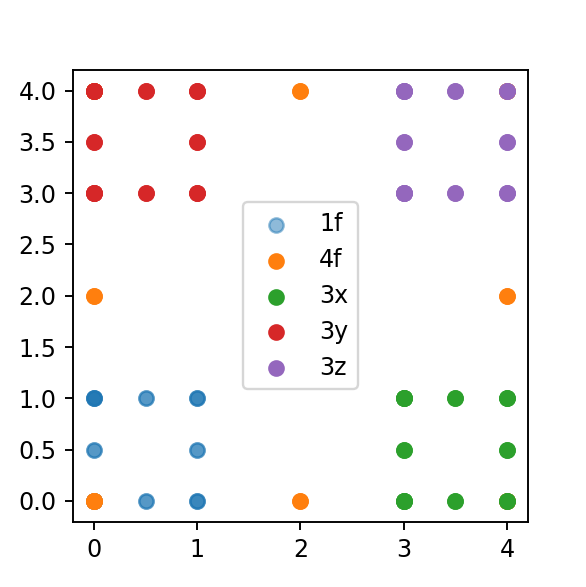

In [9]:
f = 1
tx, ty, tz = 0, 0 ,0
def orthographicProj (f, tx, ty, tz):
    return np.array([[f,0,0,tx],
                      [0,f,0,ty],
                      [0,0,0,tz]])


colors = ['red', 'green', 'blue', 'yellow', 'orange']
labels = ['1f', '4f', '3x', '3y', '3z']


#Straight orthographic projection 3d homogeneous
P  = orthographicProj(1,0,0,0)
fig = plt.figure(2)
fig.set_size_inches(2, 2)
proj = np.dot(P,res[3])
plt.scatter(proj[0,:], proj[1,:], alpha=0.5)


P  = orthographicProj(4,0,0,0)
proj = np.dot(P,res[3])
fig.set_size_inches(2, 2)
plt.scatter(proj[0,:], proj[1,:])


P  = orthographicProj(1,3,0,0)
proj = np.dot(P,res[3])
fig.set_size_inches(2, 2)
plt.scatter(proj[0,:], proj[1,:])

P  = orthographicProj(1,0,3,0)
proj = np.dot(P,res[3])
fig.set_size_inches(2, 2)
plt.scatter(proj[0,:], proj[1,:])

P  = orthographicProj(1,3,3,3)
proj = np.dot(P,res[3])
fig.set_size_inches(2, 2)
plt.scatter(proj[0,:], proj[1,:])

plt.legend(labels)

<IPython.core.display.Javascript object>


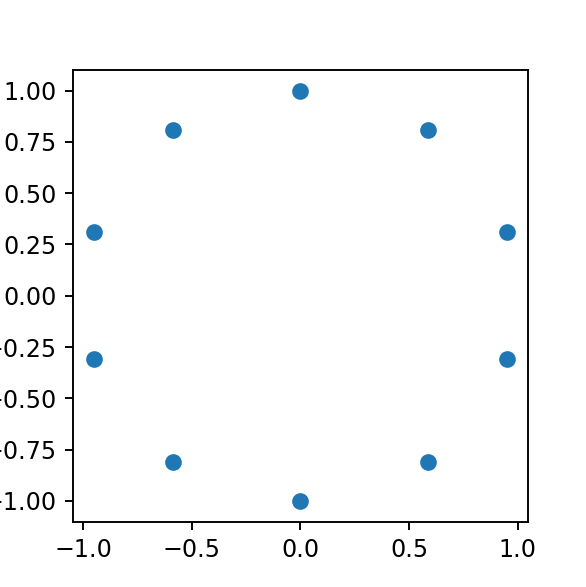

In [10]:
#Perspective projection without rotation (i.e. the image plane is parallel to the largest face of each 3D shape)
f = 1
tx, ty, tz = 0, 0 ,0
K = np.array([[f,0,0,0],
              [0,f,0,0],
              [0,0,1,0]])
E = np.array([[1,0,0,tx],
              [0,1,0,ty],
              [0,0,1,tz],
              [0,0,0,1]])
             
P = K.dot(E)
fig = plt.figure()
fig.set_size_inches(2, 2)
proj = np.dot(P,res[1])
plt.scatter(proj[0,:], proj[1,:])


[[ 0.15425145  0.         -0.98803162  1.        ]
 [ 0.          1.          0.          1.        ]
 [ 0.98803162  0.          0.15425145  1.        ]
 [ 0.          0.          0.          1.        ]]


<IPython.core.display.Javascript object>


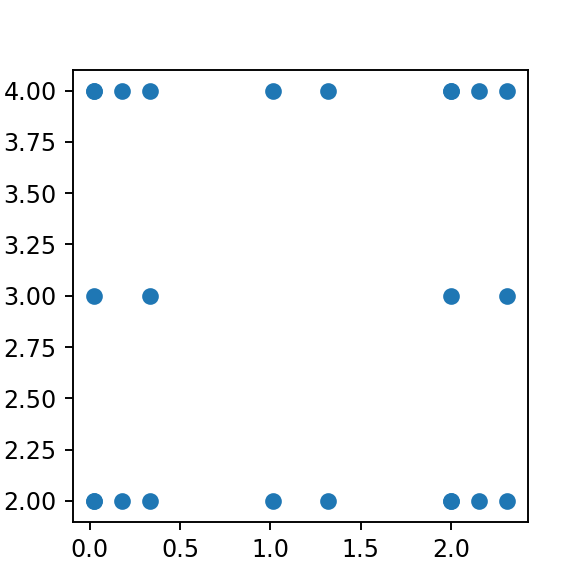

[[0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.5
  0.  0.5 0.  0.5 0.  0.5]
 [1.  0.5 0.  0.  0.  0.5 1.  1.  1.  0.5 0.  0.  0.  0.5 1.  1.  0.  0.
  0.  0.  1.  1.  1.  1. ]
 [0.  0.  0.  0.5 1.  1.  1.  0.5 0.  0.  0.  0.5 1.  1.  1.  0.5 0.  0.
  1.  1.  1.  1.  0.  0. ]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. ]]


In [11]:
#Perspective projection with rotation 
f = 2
K = np.array([[f,0,0,0],
              [0,f,0,0],
              [0,0,1,0]])
E = np.array([[1,0,0,1],
              [0,1,0,1],
              [0,0,1,1],
              [0,0,0,1]])
xtheta = 45
ytheta = 30
ztheta = 60
cx, sx = np.cos(xtheta), np.sin(xtheta)
cy, sy = np.cos(ytheta), np.sin(ytheta)
cz, sz = np.cos(ztheta), np.sin(ztheta)
# x rotation matrix
Qx = np.array([[1, 0, 0], 
            [0, cx, -sx], 
            [0, sx, cx]])
# # y rotation matrix
Qy = np.array([[cy, 0, sy], 
                    [0, 1, 0], 
                    [-sy, 0, cy]])
# z rotation matrix
Qz = np.array([[cz, -sz, 0], 
                    [sz, cz, 0], 
                    [0, 0, 1]])

E = E.astype(np.float64)
E[:3, :3] = Qy
P = K.dot(E)
print(E)
fig = plt.figure()
fig.set_size_inches(2, 2)
proj = np.dot(P,res[3])
print(res[3])
plt.scatter(proj[0,:], proj[1,:])

<b>
<font size="+1">Exercise 2:</font>
</b>
<font size="+1">Camera geometry and stereo </font> <b>(7)</b>

<p> References:
<a href="http://ugweb.cs.ualberta.ca/~vis/courses/CompVis/lectures18/lec06GeomIntro.pdf">lec06GeomIntro.pdf</a>
slide 68, and
<a href="https://courses.cs.washington.edu/courses/cse455/09wi/Lects/lect16.pdf">lect16.pdf (external)</a>
slides 12 - 14

</p><blockquote>
<p>
<font size="+1"><b>a. </b>Focal length</font> <b>(1)</b>
</p><p>Determine the focal length of the camera using a picture of a ruler
placed at a known depth from the camera, parallel with the camera plane.
Use 2 or more images and pick the best result. Note that the focal length that you obtain will be measured in pixels.
</p><p><i>Hint:</i> Use similar triangles formed with the ruler and its projection
in the image; measure the dimension of the sampled line in 3D and image.

In [1]:
import cv2
import numpy as np

#rgb to bgr
import matplotlib.pyplot as plt

# A = cv2. imread('img.png',0)

# cv2.imshow('windowName', A)
# cam = cv2.VideoCapture(0, cv2.CAP_FIREWIRE)
cam = cv2.VideoCapture(0)
cv2.namedWindow("test")
path = ""
img_counter = 0
while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)
    k = cv2.waitKey(1)
    if k%256 == 27:
    # ASCII:ESC pressed, exit
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
    # ASCII:SPACE pressed, capture frame
        # img_name = path + "frame{}.png".format(img_counter)
        img_name = path + "scene{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        # print("{} written!".format(img_name))
        img_counter += 1
print("{} written!".format(img_name))
cam.release()
cv2.destroyAllWindows()

Escape hit, closing...
scene9.png written!


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
def draw_point(event, x, y, flags, param):
   global Input, arrPoints
   if event == cv.EVENT_LBUTTONDOWN:
      Input = cv.circle(Input, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
      arrPoints.append(np.array([x,y]))


arrPoints = []
img = "frame0.png"
Input = cv. imread(img) 
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)


while len(arrPoints)<1:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break
cv.destroyAllWindows()
img = "frame1.png"
Input = cv. imread(img) 
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)
while len(arrPoints)<2:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break

cv.destroyAllWindows()
arrPoints = np.array(arrPoints)
print(arrPoints)
xl, xr = arrPoints[:,0]
z = 24.5
b = 12
f = z*(xl - xr)/b


print(f)

[[447 200]
 [153 206]]
600.25


</p><p>&nbsp;<font size="+1"><b>b. </b>Determine the 3D structure of a box object using
stereo with 2 images</font> <b>(2)</b>
</p><ul>
<li>
Select some features that characterize the structure ( <font size="+0">ex.
corners of the cube).</font>
</li>

<li>
<font size="+0">Move the camera on a line perpendicular to the camera axis
for a known distance and take a second picture. Select the points
corresponding
to the ones from the first image.</font>
</li>

<li>
Determine the depth of the feature points using corresponding points in
the two images.</li>

<br><i>hint:</i> simple stereo reconstruction with parallel cameras&nbsp;
use the focal length determined at question a and the measured distance
between the camera positions.
<br><strong>What happens if the translation is not in a plane perpendicular to
the camera axis? Try to draw a diagram and explain the results.</strong>
<li>
Use determined depth to reconstruct the 3D coordinates of the points (in
a camera centered coordinate system). Check if the structure is correct
(parallel lines are parallel ...).</li>
</ul>

[[305 373]
 [345 379]
 [291 235]
 [342 232]
 [419 368]
 [450 349]
 [ 66 263]
 [ 92 260]
 [ 69 381]
 [ 91 387]
 [102 388]
 [200 379]]
[25.10460251 23.71541502 27.02702703 23.90438247 18.92744479 24.        ]


<IPython.core.display.Javascript object>


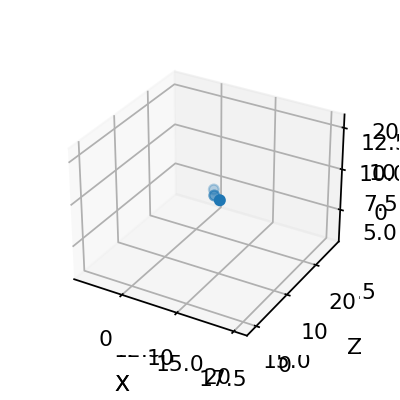

C:\Users\Dariu\anaconda3\envs\tf\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:902: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\Dariu\anaconda3\envs\tf\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


Text(0.5, 0, 'Y')

In [6]:
f = 600
b = 10
# depth = f * b/(xl - xr)


import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib notebook
def draw_point(event, x, y, flags, param):
   global Input, arrPoints
   if event == cv.EVENT_LBUTTONDOWN:
      Input = cv.circle(Input, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
      arrPoints.append(np.array([x,y]))


arrPoints = []
img = "box0.png"
Input = cv. imread(img) 
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)

size = 6
while len(arrPoints)<size:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break
cv.destroyAllWindows()
img = "box1.png"
Input = cv. imread(img) 
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)

while len(arrPoints)<size*2:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break

cv.destroyAllWindows()
arrPoints = np.array(arrPoints)
print(arrPoints)
l = arrPoints[:size]
r = arrPoints[size:size*2]

z = f * b/(l[:,0] - r[:,0])
x = l[:,0]*z/f
y = l[:,1]*z/f


c = np.ones((size))
res = np.array([x, z, y, c])
print(z)
fig = plt.figure(10)
fig.set_size_inches(4, 4)
ax = plt.axes(projection="3d")
ax.scatter3D(*res)
min = np.min(res, axis = 1)
max = np.min(res, axis = 1)
ax.set_xlim3d(min[0]-5, max[0]+5)
ax.set_ylim3d(min[1]-5, min[1]+5)
ax.set_zlim3d(min[2]-5, min[2]+5)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')


<font size="+1"><b>c.</b> Determine the 3D structure of a box object using
stereo with a set of images</font> <b>(4)</b>
<br>
<br>
<font size="+1">&nbsp;&nbsp;&nbsp; </font><b>Synthetic data</b>
<ul>
<li>

Build a 3D representation of a box object.</li>

<li>
Project the&nbsp; structure on a set of <i>n</i> (~ 10) images along a line
perpendicular to camera axis at regular intervals.
Perform a perspective projection with&nbsp; a camera that has the focal
length determined in exercise 3a.</li>

<li>
Formulate a least square problem for determining the depth of the feature
points using all the images.</li>

<li>
Reconstruct the 3D coordinates and compare the results with the starting
structure.</li>
</ul>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b> Real data</b>
<ul>
<li>
Move the object (or camera) on a line perpendicular to the camera axis and
use MTF
to track a set of feature points that characterize the structure. Take
images
at regular intervals along the line. <br>
Practical hints: To capture a small object put the object on a piece of
paper or cardboard. Slide along the edge of a ruler, the bench or other
guide. Arrange the camera to point perpendicular to the sliding surface.
Alternatively, if you use the webcams, you can have the object fixed and
slide the camera along a ruler.
</li>

<li>
Reconstruct the depth and 3D coordinates of the points as in the case of
synthetic data and plot the results. Compare the structure with the real
one. Is the structure more accurate than the one from part b)?</li>
</ul>

<p>In addition to your own captured data, you can use this sample pattern sequence (<a href="http://www.cs.ualberta.ca/~jag/courses/ImProc/assignments2002/assignment2/Stereo.mat">Stereo.mat</a>)
to test your program.</p>
Getting data to matlab: <code>load Stereo</code>
<br>
We tracked<font color="#3366FF"> NrPoints = 16 </font>
<font color="#000000">points</font>
on a calibration pattern in <font color="#3366FF">NrFrames=9 </font>frames.
<a href="http://www.cs.ualberta.ca/~jag/courses/ImProc/assignments2002/assignment2/pattern.tif">Here</a>
is an image of the pattern and the tracked points. The camera was moved
on a line perpendicular to camera axis and the frames are taken at <font color="#3366FF">d
= 5cm</font> intervals along the line. You can choose <font color="#3366FF">f
= 100.&nbsp;</font> We stored the tracked points in <font color="#3366FF">W
</font>of
size <font color="#3366FF">2*NrFrames x&nbsp; NrPoints </font>where
<font color="#3366FF">row i:&nbsp;</font> represents the horizontal
coordinate (<font color="#3366FF">u</font>) of the points
<font color="#3366FF">row i+NrFrames: </font>represents the vertical
coordinate (<font color="#3366FF">v</font>) of the points

</blockquote>
<br>

3d point [x,y,z 1]
use H 4x4 projective transormation
15 deof

[[268.53482 332.30444]
 [399.26477 275.78558]
 [533.8342  364.25882]]
268.53482
399.26477
533.8342
[[247.88292 331.90567]
 [383.16238 275.63937]
 [510.81406 364.6507 ]]
247.88292
383.16238
510.81406


<IPython.core.display.Javascript object>


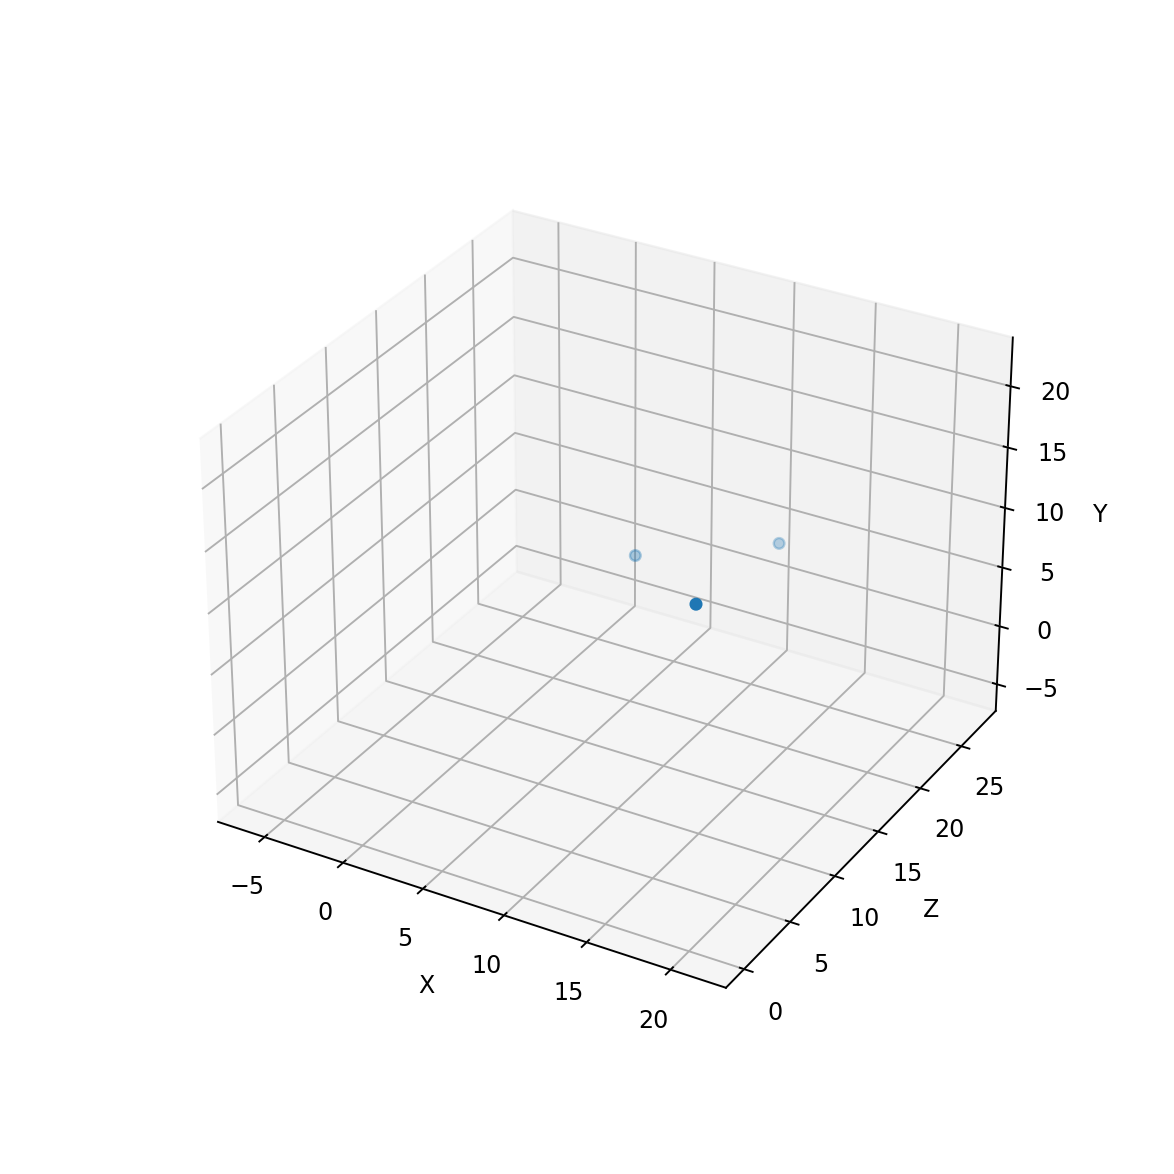

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import lk as tracker
%matplotlib notebook
f = 600
b = .5
numPoints = 3
images = 2
def draw_point(event, x, y, flags, param):
   global Input, arrPoints
   if event == cv.EVENT_LBUTTONDOWN:
      Input = cv.circle(Input, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
      arrPoints.append(np.array([x,y]))

Input = cv.imread("scene0.png")
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)
arrPoints = []

while len(arrPoints)<numPoints:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break
# constantPoints = arrPoints[2:4]
# arrPoints[2:4] = [0,0], [0,0]
init_corners = np.array(arrPoints).T

tracker.initTracker(Input, init_corners)
init_corners = init_corners.T
# print(init_corners)
cv.destroyAllWindows()
A = np.zeros((numPoints,images))
for i in range(1,images+1):
    # read frame
    frame = cv.imread("scene{}.png".format(i))
    points = tracker.updateTracker(frame)
    points = points.T
    print(points)
    for j in range(len(points)):
        frame = cv.circle(frame, (int(points[j,0]), int(points[j,1])), radius=10, color=(0, 0, 255), thickness=-1)
        # print(init_corners[j,:] - points[j,:])
        print(points[j,0])
        A[j,i-1] =  init_corners[j,0] - points[j,0]
       
#     print(A)
    cv.imshow("test", frame)
    k = cv.waitKey(0)
df = b*f*np.arange(1,images+1,1)
df = np.array(([df]))
Z = []

for i in range(numPoints):  
    M = np.array(([A[i]]))
    
#     print("m",M)
#     print("df", df)
    # line of best fit using least squares
    z = np.linalg.pinv(M.T) @ df.T
#     print(z)
    Z.append(z[0])
z = np.array(Z).flatten()


x = init_corners[:,0]*z/f
y = init_corners[:,1]*z/f


c = np.ones((numPoints))
# print(x, y, z, c)
res = np.array([x, z, y, c])

fig = plt.figure(10)
fig.set_size_inches(4, 4)
ax = plt.axes(projection="3d")
ax.scatter3D(*res)
min = np.min(res, axis = 1)
max = np.max(res, axis = 1)


ax.set_xlim3d(min[0]-15, max[0]+15)
ax.set_ylim3d(min[1]-15, max[1]+15)
ax.set_zlim3d(min[2]-15, max[2]+15)

# print(Z)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
cv.destroyAllWindows()


#stereo vision


<IPython.core.display.Javascript object>


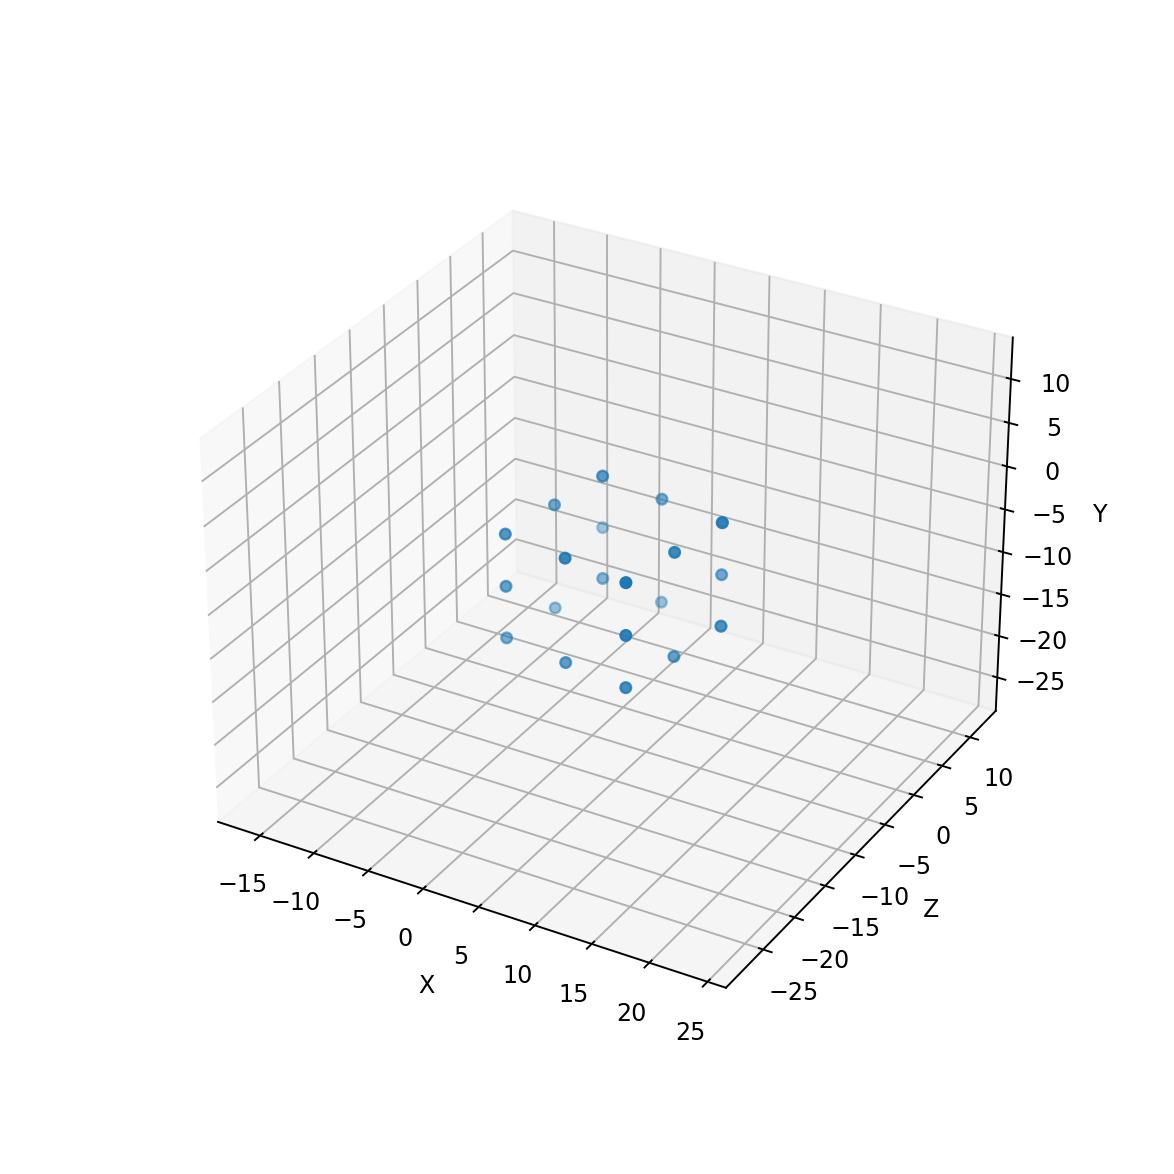

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib notebook


numPoints = 24
images = 8

#Perspective projection with rotation 
f = 1
b = 1
K = np.array([[f,0,0,0],
              [0,f,0,0],
              [0,0,1,0]])
E = np.array([[1,0,0,1],
              [0,1,0,1],
              [0,0,1,1],
              [0,0,0,1]])
ytheta = 30

cy, sy = np.cos(ytheta), np.sin(ytheta)

# # y rotation matrix
Qy = np.array([[cy, 0, sy], 
                    [0, 1, 0], 
                    [-sy, 0, cy]])

E = E.astype(np.float64)
E[:3, :3] = Qy
P = K.dot(E)



input = createWireframe([0,0,0], [0,0,10], [0,10,10], [0,10,0],[10,0,0], [10,0,10], [10,10,10], [10,10,0], 2)


def translatePoints(P, input):
    input = np.dot(P,input)
    input = (input/input[2])
    input = np.array(input).T
    return input
init_corners = translatePoints(P, input)

# print(init_corners)
cv.destroyAllWindows()
A = np.zeros((numPoints,images))
for i in range(1,images+1):
    # read frame
    E[0,3] = i
    P = K.dot(E)
    
    points = translatePoints(P, input)
    
    for j in range(len(points)):
        # print(init_corners[j,:] - points[j,:])
        
        A[j,i-1] =  init_corners[j,0] - points[j,0]
       

df = b*f*np.arange(1,images+1,1)
df = np.array(([df]))
Z = []

for i in range(numPoints):  
    M = np.array(([A[i]]))
    # line of best fit using least squares
    z = np.linalg.pinv(M.T) @ df.T
    Z.append(z[0])
z = np.array(Z).flatten()


x = init_corners[:,0]*z/f
y = init_corners[:,1]*z/f


c = np.ones((numPoints))
# print(x, y, z, c)
res = np.array([x, z, y, c])

fig = plt.figure(10)
fig.set_size_inches(4, 4)
ax = plt.axes(projection="3d")
ax.scatter3D(*res)
min = np.min(res, axis = 1)
max = np.max(res, axis = 1)


ax.set_xlim3d(min[0]-15, max[0]+15)
ax.set_ylim3d(min[1]-15, max[1]+15)
ax.set_zlim3d(min[2]-15, max[2]+15)

ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
cv.destroyAllWindows()
#https://link.springer.com/content/pdf/10.1007/978-3-642-17286-1_9.pdf